# AS - TME6
2018-2019

Binome : Stieban Fernandez, Juliette Ortholand

---

Préparation des données

In [1]:
import sys
sys.path.insert(0, "/users/Enseignants/baskiotis/.local/lib/python3.5/site-packages")

In [24]:
import logging
import torchtext
import torchtext.datasets as datasets
import torchtext.data as data
import torch.nn as nn
import torch

import matplotlib.pyplot as plt
import tensorboard
import tensorboardX
import tensorflow
import spacy
import nltk

In [35]:
import numpy as np

In [14]:
DATA_DIR="C:\\Users\\Juliette\\Documents\\data_as"

DATASET_DIR="%s/datasets" % DATA_DIR
VECTORS_DIR="%s/vectors" % DATA_DIR

# text
TEXT=data.ReversibleField(lower=True,include_lengths=False,batch_first=True)
LABEL = data.Field(sequential=False, is_target=True)

# make splits for data
train, val, test = datasets.sst.SST.splits(TEXT, LABEL,root=DATASET_DIR)

# Use the vocabulary
wordemb = torchtext.vocab.GloVe("6B", dim=100, cache=VECTORS_DIR)
# Build the vocabularies
# for labels, we use special_first to False so <unk> is last
# (to discard it)
TEXT.build_vocab(train, vectors=wordemb)
LABEL.build_vocab(train, specials_first=False)
train_iter, val_iter, test_iter = data.BucketIterator.splits(
(train, val, test), batch_size=1000, device=0)

nn_embeddings = nn.Embedding.from_pretrained(TEXT.vocab.vectors)

The `device` argument should be set by using `torch.device` or passing a string as an argument. This behavior will be deprecated soon and currently defaults to cpu.
The `device` argument should be set by using `torch.device` or passing a string as an argument. This behavior will be deprecated soon and currently defaults to cpu.
The `device` argument should be set by using `torch.device` or passing a string as an argument. This behavior will be deprecated soon and currently defaults to cpu.


In [15]:
len(TEXT.vocab)

15381

In [20]:
for batch in train_iter:
        t = batch.text # batch_size phrases de max nb mots (taille variable), reste du vecteur complété par 1
        l = batch.label # catégorie de la phrase 
        x = nn_embeddings(t).transpose(1,2) # shape : (batch_size, input_channels, nb_mots_max)
        print(t[0])
        orig_text = TEXT.reverse(t.data)
        print(orig_text)

tensor([ 9303,   203,   121,    17,   629,  1070,     6,  1939, 11372,     7,
        11514,   525,   103,    56,  9908,     2,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1])


['charly comes off as emotionally manipulative and sadly imitative of innumerable past love story derisions .', 'miller comes at film with bracing intelligence and a vision both painterly and literary .', 'ultimately , jane learns her place as a girl , softens up and loses some of the intensity that made her an interesting character to begin with .', 'but even while his characters are acting horribly , he is always sympathetic .', "the script , the gags , the characters are all direct-to-video stuff , and that 's where this film should have remained .", "it 's petty thievery like this that puts flimsy flicks like this behind bars", 'chamber of secrets will find millions of eager fans .', "cusack 's just brilliant in this .", 'the most compelling performance of the year adds substantial depth to this shocking testament to anti-semitism and neo-fascism .', 'its salient points are simultaneously buried , drowned and smothered in the excesses of writer-director roger avary .', 'and a very 

tensor([ 699,   45,   46,    3, 3853,    7,    3,  340,    2,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1])


['suffers from all the excesses of the genre .', "a hugely rewarding experience that 's every bit as enlightening , insightful and entertaining as grant 's two best films -- four weddings and a funeral and bridget jones 's diary .", 'it jumps around with little logic or continuity , presenting backstage bytes of information that never amount to a satisfying complete picture of this particular , anciently demanding mã©tier .', 'waydowntown manages to nail the spirit-crushing ennui of denuded urban living without giving in to it .', "insomnia does not become one of those rare remakes to eclipse the original , but it does n't disgrace it , either .", "director kevin bray excels in breaking glass and marking off the `` miami vice '' checklist of power boats , latin music and dog tracks .", 'to others , it will remind them that hong kong action cinema is still alive and kicking .', "there 's something poignant about an artist of 90-plus years taking the effort to share his impressions of li

tensor([  22,   46,   26,  586, 1967,    4, 1390, 1218,   26,  632, 5121,    4,
         358, 6618,   57,   38,   26, 7369, 1187,    2,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1])


['for all its brilliant touches , dragon loses its fire midway , nearly flickering out by its perfunctory conclusion .', 'the film is old-fashioned , occasionally charming and as subtle as boldface .', 'this film is so different from the apple and so striking that it can only encourage us to see samira makhmalbaf as a very distinctive sensibility , working to develop her own film language with conspicuous success .', 'as directed by dani kouyate of burkina faso , sia lacks visual flair .', 'a sharp , amusing study of the cult of celebrity .', 'davis ... gets vivid performances from her cast and pulls off some deft ally mcbeal-style fantasy sequences .', 'stupid , infantile , redundant , sloppy , over-the-top , and amateurish .', 'at 90 minutes this movie is short , but it feels much longer .', 'almost .', 'that chirpy songbird britney spears has popped up with more mindless drivel .', 'a gem , captured in the unhurried , low-key style favored by many directors of the iranian new wave .

tensor([ 216,   22, 7017, 7653,    9,   11,  176,    4,    6,   91,   92,   17,
         109,   27,   74,   21,    5, 7903,  171,    2,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1])


["go for la salle 's performance , and make do as best you can with a stuttering script .", 'this odd , distant portuguese import more or less borrows from bad lieutenant and les vampires , and comes up with a kind of art-house gay porn film .', '-lrb- evans is -rrb- a fascinating character , and deserves a better vehicle than this facetious smirk of a movie .', "though it 's not very well shot or composed or edited , the score is too insistent and the dialogue is frequently overwrought and crudely literal , the film shatters you in waves .", 'a glorious mess .', 'a guilty pleasure at best , and not worth seeing unless you want to laugh at it .', 'this charming but slight tale has warmth , wit and interesting characters compassionately portrayed .', '... a guiltless film for nice evening out .', 'peter jackson and company once again dazzle and delight us , fulfilling practically every expectation either a longtime tolkien fan or a movie-going neophyte could want .', "even if you do n't

tensor([10782,    12,    94,    81,     4,    19,    36,   344,    15,     5,
          465,    10,    57,    10,   614,    87,     2,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1])


['fubar is very funny , but not always in a laugh-out-loud way .', 'tv skit-com material fervently deposited on the big screen .', 'a uniquely sensual metaphorical dramatization of sexual obsession that spends a bit too much time on its fairly ludicrous plot .', 'more successful at relating history than in creating an emotionally complex , dramatically satisfying heroine', 'pleasant but not more than recycled jock piffle .', "it 's a pedestrian , flat drama that screams out ` amateur ' in almost every frame .", 'an hour and a half of joyful solo performance .', "jackson tries to keep the plates spinning as best he can , but all the bouncing back and forth ca n't help but become a bit tedious -- even with the breathtaking landscapes and villainous varmints there to distract you from the ricocheting .", "davis ' candid , archly funny and deeply authentic take on intimate relationships comes to fruition in her sophomore effort .", "a meatier deeper beginning and\\/or ending would have eas

tensor([  13,    9,   11,   89,  465,   10,   57,   10,  614,   81,    4,   19,
          13,   12, 1124,  381,    2,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1])


["it 's never laugh-out-loud funny , but it is frequently amusing .", 'it is also a testament to the integrity and vision of the band .', 'this is not a jackie chan movie .', 'if you value your time and money , find an escape clause and avoid seeing this trite , predictable rehash .', "paxton 's uneven directorial debut fails to unlock the full potential of what is in many ways a fresh and dramatically substantial spin on the genre .", 'really quite funny .', 'pray has really done his subject justice .', "as much as i laughed throughout the movie , i can not mount a cogent defense of the film as entertainment , or even performance art , although the movie does leave you marveling at these guys ' superhuman capacity to withstand pain .", "it 's so devoid of joy and energy it makes even jason x ... look positively shakesperean by comparison .", 'the sort of picture in which , whenever one of the characters has some serious soul searching to do , they go to a picture-perfect beach during 

tensor([  13,  104,   27,  435,    3,  158,    6, 4671,  648, 1518,  647,    6,
        8882,   15,   84,  417,   10,  625,   20,    2,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1])


['it makes you believe the cast and crew thoroughly enjoyed themselves and believed in their small-budget film .', 'this ill-conceived and expensive project winds up looking like a bunch of talented thesps slumming it .', 'as commander-in-chief of this film , bigelow demonstrates a breadth of vision and an attention to detail that propels her into the upper echelons of the directing world .', 'but what is missing from it all is a moral .', 'precocious smarter-than-thou wayward teen struggles to rebel against his oppressive , right-wing , propriety-obsessed family .', 'death to smoochy tells a moldy-oldie , not-nearly - as-nasty - as-it - thinks-it-is joke .', "breen 's script is sketchy with actorish notations on the margin of acting .", "pete 's screenplay manages to find that real natural , even-flowing tone that few movies are able to accomplish .", 'rodriguez has the chops of a smart-aleck film school brat and the imagination of a big kid ...', "not since ghostbusters has a film us

tensor([   24,    12,    36,  2289,     9,    11,   109,     4,    19,    75,
           49,  2765,   247, 12622,     3,   109,    78,  1049,    74,   760,
            2,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1])


["this is not chabrol 's best , but even his lesser works outshine the best some directors can offer .", "tsai ming-liang 's witty , wistful new film , what time is it there ?", 'at its best -lrb- and it does have some very funny sequences -rrb- looking for leonard reminds you just how comically subversive silence can be .', "a boring , pretentious muddle that uses a sensational , real-life 19th-century crime as a metaphor for -- well , i 'm not exactly sure what -- and has all the dramatic weight of a raindrop .", "we hate -lrb- madonna -rrb- within the film 's first five minutes , and she lacks the skill or presence to regain any ground .", 'frequent flurries of creative belly laughs and genuinely enthusiastic performances ... keep the movie slaloming through its hackneyed elements with enjoyable ease .', "often messy and frustrating , but very pleasing at its best moments , it 's very much like life itself .", "however , it 's pleasant enough and its ecological , pro-wildlife sentim

tensor([   3,   20,   40,    3, 2927,  907,    8,  223,  230, 2828,  110,   27,
         269,   13,    9,   11,   15, 3749,    7,  283,  623,    2,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1])


["the film has the uncanny ability to right itself precisely when you think it 's in danger of going wrong .", "this movie may not have the highest production values you 've ever seen , but it 's the work of an artist , one whose view of america , history and the awkwardness of human life is generous and deep .", 'woefully pretentious .', 'a good thriller .', 'for most of the distance the picture provides a satisfyingly unsettling ride into the dark places of our national psyche .', 'charlotte sometimes is a brilliant movie .', "american musical comedy as we know it would n't exist without the precedent of yiddish theater , whose jolly , fun-for-fun 's - sake communal spirit goes to the essence of broadway .", "sheridan 's take on the author 's schoolboy memoir ... is a rather toothless take on a hard young life .", 'for most of its footage , the new thriller proves that director m. night shyamalan can weave an eerie spell and that mel gibson can gasp , shudder and even tremble without

In [4]:
TEXT.vocab.vectors.shape

torch.Size([16583, 100])

In [5]:
nn_embeddings

Embedding(16583, 100)

Test

In [27]:
class ConvNet1(nn.Module):
    
    def __init__(self):
        super(ConvNet1, self).__init__()
        
        self.conv = nn.Sequential(
           nn.Conv1d(100, 500, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool1d(2, stride=2),
        )
        self.clas = nn.Sequential(
            nn.Linear(200, 600),
            nn.ReLU(),
            nn.Linear(600, 3)
        )
    
    def forward(self, X):
        out = self.conv(X)
        out = out.mean(dim=len(out.shape)-1)
        out = out.view(X.shape[0], -1)
        return out


0
torch.Size([1000, 100, 53])
torch.Size([1000, 500])


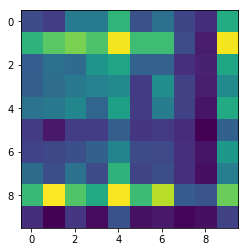

while you have to admit it 's semi-amusing to watch robert deniro belt out `` when you 're a jet , you 're a jet all the way , '' it 's equally distasteful to watch him sing the lyrics to `` tonight . ''
torch.Size([1000, 100, 59])
torch.Size([1000, 500])


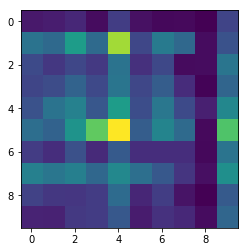

if you are curious to see the darker side of what 's going on with young tv actors -lrb- dawson leery did what ?!? -rrb- , or see some interesting storytelling devices , you might want to check it out , but there 's nothing very attractive about this movie .
torch.Size([544, 100, 55])
torch.Size([544, 500])


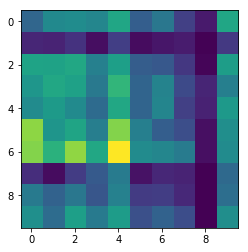

as with so many merchandised-to-the-max movies of this type , more time appears to have gone into recruiting the right bands for the playlist and the costuming of the stars than into the script , which has a handful of smart jokes and not much else .
torch.Size([1000, 100, 59])
torch.Size([1000, 500])


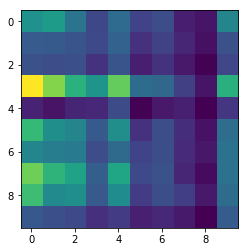

if s&m seems like a strange route to true love , maybe it is , but it 's to this film 's -lrb- and its makers ' -rrb- credit that we believe that that 's exactly what these two people need to find each other -- and themselves .
torch.Size([1000, 100, 53])
torch.Size([1000, 500])


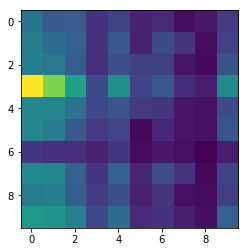

it may not be as cutting , as witty or as true as back in the glory days of weekend and two or three things i know about her , but who else engaged in filmmaking today is so cognizant of the cultural and moral issues involved in the process ?
torch.Size([1000, 100, 54])
torch.Size([1000, 500])


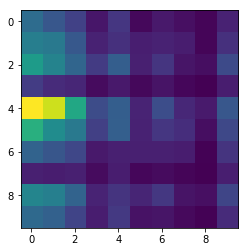

the ending does n't work ... but most of the movie works so well i 'm almost recommending it , anyway -- maybe not to everybody , but certainly to people with a curiosity about how a movie can go very right , and then step wrong .
torch.Size([1000, 100, 64])
torch.Size([1000, 500])


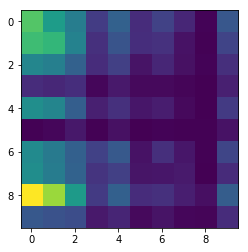

there are n't too many films that can be as simultaneously funny , offbeat and heartwarming -lrb- without a thick shmear of the goo , at least -rrb- , but `` elling '' manages to do all three quite well , making it one of the year 's most enjoyable releases .
torch.Size([1000, 100, 54])
torch.Size([1000, 500])


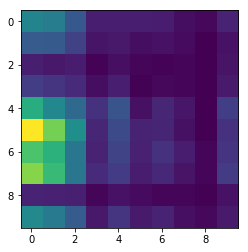

it 's a bad sign when you 're rooting for the film to hurry up and get to its subjects ' deaths just so the documentary will be over , but it 's indicative of how uncompelling the movie is unless it happens to cover your particular area of interest .
torch.Size([1000, 100, 55])
torch.Size([1000, 500])


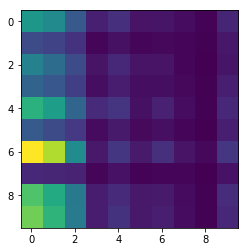

build some robots , haul 'em to the theatre with you for the late show , and put on your own mystery science theatre 3000 tribute to what is almost certainly going to go down as the worst -- and only -- killer website movie of this or any other year .
1
torch.Size([1000, 100, 64])
torch.Size([1000, 500])


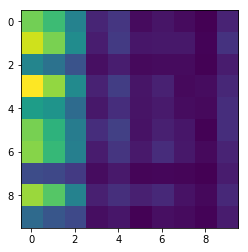

-lrb- city -rrb- reminds us how realistically nuanced a robert de niro performance can be when he is not more lucratively engaged in the shameless self-caricature of ` analyze this ' -lrb- 1999 -rrb- and ` analyze that , ' promised -lrb- or threatened -rrb- for later this year .
torch.Size([1000, 100, 59])
torch.Size([1000, 500])


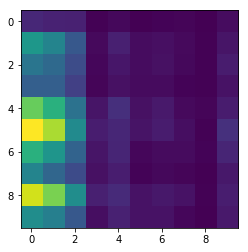

if s&m seems like a strange route to true love , maybe it is , but it 's to this film 's -lrb- and its makers ' -rrb- credit that we believe that that 's exactly what these two people need to find each other -- and themselves .
torch.Size([1000, 100, 62])
torch.Size([1000, 500])


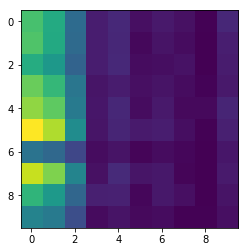

there are n't too many films that can be as simultaneously funny , offbeat and heartwarming -lrb- without a thick shmear of the goo , at least -rrb- , but `` elling '' manages to do all three quite well , making it one of the year 's most enjoyable releases .
torch.Size([1000, 100, 54])
torch.Size([1000, 500])


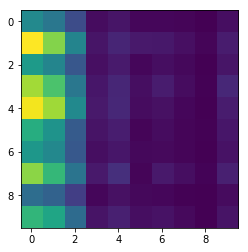

the ending does n't work ... but most of the movie works so well i 'm almost recommending it , anyway -- maybe not to everybody , but certainly to people with a curiosity about how a movie can go very right , and then step wrong .
torch.Size([1000, 100, 55])
torch.Size([1000, 500])


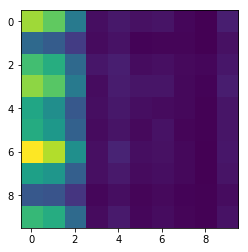

build some robots , haul 'em to the theatre with you for the late show , and put on your own mystery science theatre 3000 tribute to what is almost certainly going to go down as the worst -- and only -- killer website movie of this or any other year .
torch.Size([1000, 100, 59])
torch.Size([1000, 500])


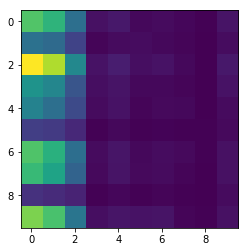

if you are curious to see the darker side of what 's going on with young tv actors -lrb- dawson leery did what ?!? -rrb- , or see some interesting storytelling devices , you might want to check it out , but there 's nothing very attractive about this movie .
torch.Size([544, 100, 55])
torch.Size([544, 500])


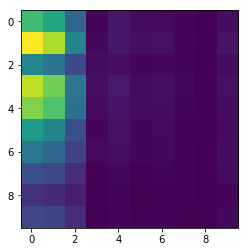

when it 's not wallowing in hormonal melodrama , `` real women have curves '' is a sweet , honest , and enjoyable comedy-drama about a young woman who wants many things in life , but fears she 'll become her mother before she gets to fulfill her dreams .
torch.Size([1000, 100, 54])
torch.Size([1000, 500])


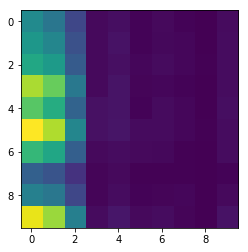

as with so many merchandised-to-the-max movies of this type , more time appears to have gone into recruiting the right bands for the playlist and the costuming of the stars than into the script , which has a handful of smart jokes and not much else .
torch.Size([1000, 100, 54])
torch.Size([1000, 500])


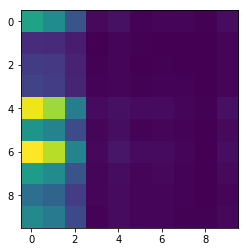

it 's hard to imagine anybody ever being `` in the mood '' to view a movie as harrowing and painful as the grey zone , but it 's equally hard to imagine anybody being able to tear their eyes away from the screen once it 's started .


In [41]:
model = ConvNet1()
loss = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

train_loss = []
val_loss = []

### Train
#--------------------------------------------------------
for i in range(2):
    ####### TRAIN #######
    print(i)
    costs_train = []
    for batch in train_iter:
        t = batch.text # batch_size phrases de max nb mots (taille variable), reste du vecteur complété par 1
        l = batch.label # catégorie de la phrase 
        x = nn_embeddings(t).transpose(1,2) # shape : (batch_size, input_channels, nb_mots_max)
        print(x.shape)
        out = model(x)
        print(out.shape)
        cost = loss(out, l)
        optim.zero_grad()
        cost.backward()
        optim.step()
        
        costs_train.append(cost)
        testtt = out.data.numpy()
        plt.imshow(testtt[:10,:10])
        plt.show()
        best = np.amax(testtt, axis=1)
        orig_text = TEXT.reverse(t.data)
        print(orig_text[best.argmax()])
        
    train_loss.append(torch.tensor(costs_train).mean())
    
    if i == 2:
        weight = model.conv[0].weight.data.numpy()
        print(weight.shape)
        plt.imshow(weight)
    
    ####### VALID #######
    costs_val = []
    for i, batch in enumerate(val_iter):
        t = batch.text 
        l = batch.label 
        x = nn_embeddings(t).transpose(1,2)

        out = model(x)
        cost = loss(out, l)
        costs_val.append(cost)
    
    
    val_loss.append(torch.tensor(costs_val).mean())


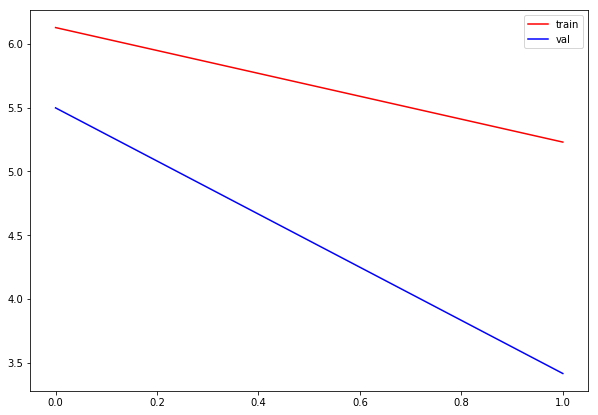

In [62]:


plt.figure(figsize=(10,7))
plt.plot(train_loss, c="red", label="train")
plt.plot(val_loss, c="b", label="val")
plt.legend(loc="best")
plt.show()

Que se passe-t-il dans un CNN?
- Etude des filtres

Travail en batch

Chaque vecteur correspond a un filtre

Remonter l'information de position, savoir a quelle portion de l'entrée le vecteur fait référence

- Pour chaque phrase, pour chaque composante : max 
- Quels sont les bouts de séquence qui activent le plus le filtre
- $(w_i, s_i) \rightarrow (w,s) \rightarrow (w_o, s_o)$ : voir le stride
- la $j_ième$ sortie correspond à ($j s_o$)... ($j s_o + w_o - 1$)

Qu'est ce qui explique ma classification ?

Quelles sont les parties de ma phrase qui définissent ce qui est positif, negatif, etc

Conv -> max pooling (1 vecteur en sortie) -> softmax

ex : Comment varie l'embedding par rapport à la sortie

- Gradient de la sortie correspondante dans le module linéaire au niveau de softmax le softmax par rapport à l'entrée x
- Si on s'apercçoit que les dérivées sont fortes --> importance

norme du gradient de X par rapport au $j_ième$ vecteur (ne pas oublier requires_grad=True)

Construction d'un réseau

In [69]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.convolutional = nn.Sequential(
            nn.Conv1d(100, 200, kernel_size=3, stride=2),
            nn.ReLU(),
            nn.MaxPool1d(2, stride=2, padding=0),
            nn.Conv1d(200, 200, kernel_size=3, stride=2),
            nn.ReLU(),
            nn.MaxPool1d(2, stride=2, padding=0),
        )
        self.classifier = nn.Sequential(
            nn.Linear(400 , 500),
            nn.ReLU(),
            nn.Linear(500, 10)
        )
        
    def forward(self, X):
        out = self.convolutional(X)
        out = out.view(X.shape[0], -1) # batch_size
        out = self.classifier(out)
        return out

In [71]:
from tensorboardX import SummaryWriter


### Initialisation
#---------------------------
model = ConvNet()
loss = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

writer = SummaryWriter()
### Apprentissage
#----------------------------

for batch in train_iter:
    t = batch.text
    l = batch.label
    x = nn_embeddings(t).transpose(1,2)
    
    out = model(x)
    print(out.shape, l.shape)
    cost = loss(x, l)
    optim.zero_grad()
    cost.backward()
    optim.step()
    break
    
    writer.add_scalar("train loss", cost)

for batch in val_iter:
    t = batch.text
    l = batch.label
    x = nn_embeddings(t).transpose(1,2)
    
    out = model(x)
    cost = loss(x, l)
    
    writer.add_scalar("val loss", cost)

RuntimeError: size mismatch, m1: [10 x 200], m2: [400 x 500] at /pytorch/aten/src/TH/generic/THTensorMath.cpp:2070

In [25]:
conv = nn.Sequential(
            nn.Conv1d(100, 500, kernel_size=3, stride=2),
            nn.ReLU(),
            nn.MaxPool1d(2, stride=2),
            nn.Conv1d(500, 200, kernel_size=3, stride=2),
            nn.ReLU(),
            nn.MaxPool1d(2, stride=2)
        )

In [26]:
conv[0]

Conv1d(100, 500, kernel_size=(3,), stride=(2,))